# About: Handwritten digits classification

The purpose of this project is to classify handwritten digits using MNIST dataset which contains $70000$ images of size $28\times 28$ pixels, labeled from 0 to 9. We will use different techniques such as *Multivariate Regression, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA)* and *Logistic Regression*.

In [94]:
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sns
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

**Loading dataset:**

In [10]:
mnist = fetch_openml('mnist_784')

In [83]:
X = mnist.data
y = [int(string_number) for string_number in mnist.target]
target_names = mnist.target_names
mnist.data.shape

(70000, 784)

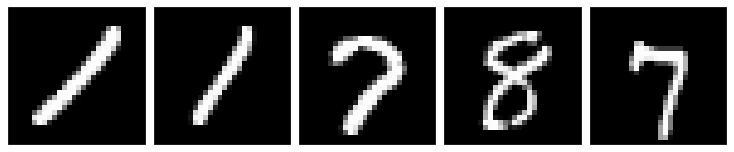

In [66]:
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot 5 random numbers
j = 1
np.random.seed(0)
for i in np.random.choice(range(70000), 5): 
    ax = fig.add_subplot(1, 5, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(X[i,:],(28,28)), cmap=plt.cm.gray, interpolation='nearest') 
    j += 1
plt.show()

**Plotting number frequencies:**

([<matplotlib.axis.XTick at 0x7fa8bed8a2b0>,
 [Text(0, 0, '5'),
  Text(1, 0, '0'),
  Text(2, 0, '4'),
  Text(3, 0, '1'),
  Text(4, 0, '9'),
  Text(5, 0, '2'),
  Text(6, 0, '3'),
  Text(7, 0, '6'),
  Text(8, 0, '7'),
  Text(9, 0, '8')])

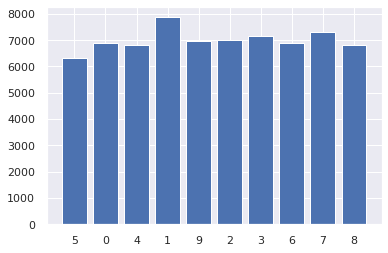

In [67]:
# counting frequencies
target_numbers_count = Counter(y).items()
target_numbers_count_dict = {}
for key, value in target_numbers_count:
    target_numbers_count_dict[key] = value


    
#plotting frequencies
sns.set(style="darkgrid")
plt.bar(range(10), list(target_numbers_count_dict.values()), align='center')
plt.xticks(range(10), list(target_numbers_count_dict.keys()))

# Multivariate Regression baseline:

The baseline we will use is given by the multivariate linear model:
$$Y=X\hat{B},$$
where $Y_{70000\times 10}$ is an indicator matrix where each row has 0 excepting the value $y_k$ where we put 1.
$X_{70000\times 784}$ is the design matrix and $\hat{B}$ is the matrix whose columns contain the 10 coefficients corresponding to $\hat{\beta_k}$. With this model, we assume a linear model for each response variable $y_k$:
$$\hat{y_k}=X\hat{\beta_k}.$$

And the classification for an observation $x$ follows the next decision rule:
$$\hat{C}(x)=\operatorname{argmax}_{k\in K}\hat{y_k}.$$

**Building Y matrix**

In [92]:
def indicator(number):
    '''
    Return a vector which contains 1 in the index position 
    given by the number. Otherwise it'll be 0.
    '''
    indicator = [0 for _ in range(10)]
    indicator[number] = 1
    return indicator

Y = map(indicator, y)
Y = np.array(list(Y))
Y[0:10] #showing the first 10 numbers

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

**Splitting in train-test datasets**

In [93]:
X_train, X_test, y_train, y_test, Y_train, Y_test = train_test_split(X, y, Y,
                                                                     test_size = 0.2,
                                                                     random_state = 42)

**Fitting a linear model to train dataset**

In [108]:
reg = linear_model.LinearRegression()
model = reg.fit(X_train,Y_train)

**Classifying using the rule decision**

In [140]:
Y_hat_test = model.predict(X_test)
C = map(np.argmax, Y_hat_test)  # classification vector
C = list(C)
C

[8,
 4,
 6,
 7,
 7,
 0,
 6,
 2,
 7,
 4,
 1,
 9,
 9,
 8,
 2,
 5,
 9,
 1,
 7,
 8,
 0,
 0,
 0,
 3,
 6,
 3,
 6,
 1,
 6,
 9,
 7,
 6,
 0,
 8,
 5,
 8,
 6,
 9,
 1,
 6,
 4,
 9,
 4,
 7,
 4,
 5,
 8,
 7,
 3,
 9,
 2,
 0,
 6,
 8,
 5,
 3,
 1,
 4,
 6,
 4,
 1,
 7,
 5,
 3,
 9,
 3,
 7,
 9,
 6,
 0,
 1,
 7,
 3,
 0,
 4,
 3,
 4,
 1,
 6,
 6,
 6,
 6,
 8,
 2,
 9,
 1,
 1,
 3,
 8,
 8,
 7,
 5,
 1,
 8,
 2,
 0,
 8,
 7,
 3,
 0,
 4,
 4,
 0,
 4,
 4,
 5,
 1,
 3,
 5,
 0,
 8,
 3,
 9,
 1,
 8,
 9,
 1,
 3,
 9,
 1,
 5,
 7,
 8,
 2,
 8,
 1,
 2,
 0,
 9,
 9,
 1,
 6,
 3,
 9,
 3,
 5,
 6,
 3,
 1,
 1,
 3,
 4,
 2,
 1,
 4,
 3,
 5,
 6,
 2,
 8,
 2,
 1,
 8,
 7,
 6,
 6,
 4,
 7,
 7,
 0,
 0,
 1,
 5,
 5,
 2,
 3,
 5,
 0,
 0,
 8,
 0,
 9,
 1,
 0,
 4,
 0,
 4,
 2,
 2,
 7,
 1,
 5,
 7,
 7,
 6,
 6,
 2,
 1,
 2,
 3,
 9,
 1,
 7,
 9,
 8,
 6,
 5,
 3,
 5,
 7,
 1,
 5,
 4,
 3,
 8,
 2,
 9,
 3,
 8,
 1,
 3,
 9,
 4,
 1,
 5,
 6,
 9,
 9,
 9,
 0,
 9,
 1,
 4,
 5,
 1,
 1,
 2,
 8,
 9,
 4,
 0,
 7,
 4,
 6,
 5,
 7,
 9,
 5,
 7,
 4,
 4,
 8,
 4,
 3,
 1,
 7,
 4,
 6,
 6,
 9,


**Comparing predictions vs real values**

In [146]:
differences = np.array(C) - np.array(y_test)
diff_freq = Counter(differences)
correct_predictions_count = diff_freq[0]
correct_predictions_count

11955

**proportion of correct predictions**

In [148]:
correct_predictions_count/len(y_test)

0.8539285714285715